In [73]:
#Importar librerias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Para mostrar el arbol de decision
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

In [58]:
# Cargar el dataset
star_data = pd.read_csv('estrellas.csv')
# star_data.head()

# Verificar si hay valores nulos
# print(star_data.isnull().sum())

# No hay valores nulos

In [60]:
X = star_data.drop(columns='Spectral Class')
y = star_data['Spectral Class']

# Dividir en train, test y validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [61]:
def preprocesar_variables_categoricas(data):
    '''Preprocesar variables categoricas'''
    # Obtener dummies de columnas Star type, Star category, Star color
    dummies = pd.get_dummies(data[['Star type', 'Star category', 'Star color']])
    # Eliminar columnas originales
    data.drop(columns=['Star type', 'Star category', 'Star color'], inplace=True)
    # Concatenar dummies
    data = pd.concat([data, dummies], axis=1)
    return data

X_train = preprocesar_variables_categoricas(X_train)
X_val = preprocesar_variables_categoricas(X_val)
X_test = preprocesar_variables_categoricas(X_test)

In [62]:
# Get all columns in X_train, X_val and X_test
all_columns = set(X_train.columns).union(set(X_val.columns)).union(set(X_test.columns))

# Add missing columns to X_train, X_val and X_test
for column in all_columns:
    if column not in X_train.columns:
        X_train[column] = False
    if column not in X_val.columns:
        X_val[column] = False
    if column not in X_test.columns:
        X_test[column] = False

# Reorder columns
X_train = X_train[list(all_columns)]
X_val = X_val[list(all_columns)]
X_test = X_test[list(all_columns)]

features = list(X_train.columns)


In [63]:
# Normalizar datos
def normalizar_datos(data):
    '''Normalizar datos'''
    scaler = StandardScaler()
    data = scaler.fit_transform(data)
    return data

X_train = normalizar_datos(X_train)
X_val = normalizar_datos(X_val)
X_test = normalizar_datos(X_test)

In [64]:
modelo_decision_tree = DecisionTreeClassifier()
modelo_decision_tree.fit(X_train, y_train)
y_pred = modelo_decision_tree.predict(X_val)

Accuracy: 0.717948717948718
Precision: [0.75, 0.3333333333333333, 0.75, 0.0, 1.0, 0.5]
Recall: [0.75, 0.2857142857142857, 0.42857142857142855, 0, 1.0, 0.8]
F1: [0.75, 0.30769230769230765, 0.5454545454545454, 0, 1.0, 0.6153846153846154]


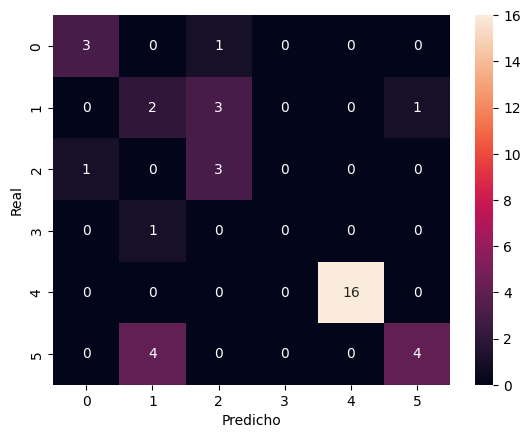

In [101]:


# # Evaluar accuracy, precision, recall y F1
def obtener_metricas_evaluacion(y_real, y_predicho):
    '''Obtener metricas de evaluacion'''

    matrix_confusion = confusion_matrix(y_real, y_predicho)
    print('Accuracy:', get_accuracy(matrix_confusion))
    print('Precision:', get_precision(matrix_confusion))
    print('Recall:', get_recall(matrix_confusion))
    print('F1:', get_f1(matrix_confusion))
    
    sns.heatmap(matrix_confusion, annot=True, fmt='d')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()

def get_accuracy(matrix_confusion):
    '''Obtener accuracy'''
    sum = 0
    for i in range(len(matrix_confusion)):
        sum += matrix_confusion[i][i]
    return sum / matrix_confusion.sum()

def get_precision(matrix_confusion):
    '''Obtener precision'''
    columns = []
    for i in range(len(matrix_confusion)):
        if matrix_confusion[i,:].sum() == 0:
            columns.append(0)
        else:
            columns.append(matrix_confusion[i][i] / matrix_confusion[i, :].sum())
    return columns

def get_recall(matrix_confusion):
    '''Obtener recall'''
    rows = []
    for i in range(len(matrix_confusion)):
        if matrix_confusion[:,i].sum() == 0:
            rows.append(0)
        else:
            rows.append(matrix_confusion[i][i] / matrix_confusion[:, i].sum())
    return rows

def get_f1(matrix_confusion):
    '''Obtener F1'''
    precision = get_precision(matrix_confusion)
    recall = get_recall(matrix_confusion)
    f1 = []
    for i in range(len(precision)):
        if precision[i] + recall[i] == 0:
            f1.append(0)
        else:
            f1.append(2 * (precision[i] * recall[i]) / (precision[i] + recall[i]))
    return f1

obtener_metricas_evaluacion(y_val, y_pred)

Accuracy: 0.8717948717948718
Precision: [1.0, 0.6666666666666666, 0.75, 0.0, 1.0, 0.875]
Recall: [0.8, 0.8, 0.75, 0, 0.9411764705882353, 0.875]
F1: [0.888888888888889, 0.7272727272727272, 0.75, 0, 0.9696969696969697, 0.875]


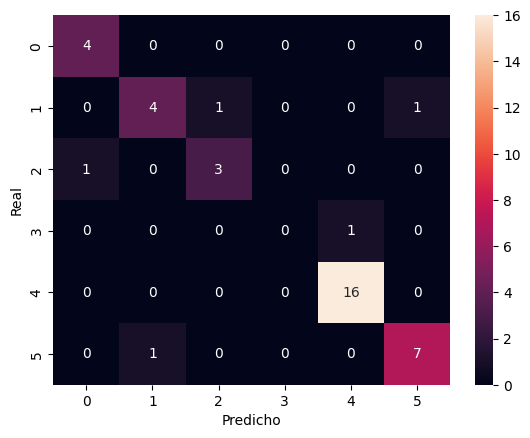

In [102]:
modelo_random_forest = RandomForestClassifier()
modelo_random_forest.fit(X_train, y_train)
y_pred = modelo_random_forest.predict(X_val)

obtener_metricas_evaluacion(y_val, y_pred)

Accuracy: 0.8717948717948718
Precision: [0.5, 0.8333333333333334, 0.75, 0.0, 1.0, 1.0]
Recall: [1.0, 0.625, 1.0, 0, 0.9411764705882353, 0.8888888888888888]
F1: [0.6666666666666666, 0.7142857142857143, 0.8571428571428571, 0, 0.9696969696969697, 0.9411764705882353]


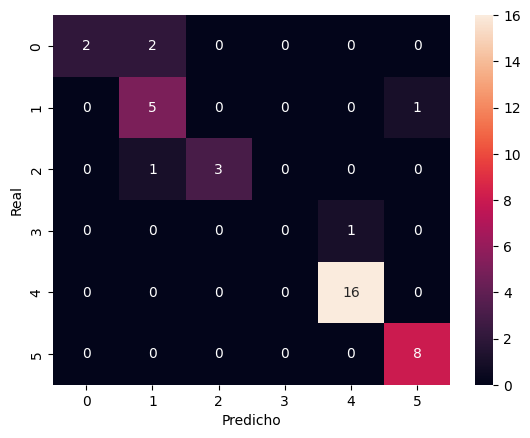

In [103]:
modelo_knn = KNeighborsClassifier(n_neighbors=3)
modelo_knn.fit(X_train, y_train)
y_pred = modelo_knn.predict(X_val)

obtener_metricas_evaluacion(y_val, y_pred)

Accuracy: 0.5641025641025641
Precision: [0.25, 1.0, 0.75, 0.0, 0, 0.75, 0.0]
Recall: [1.0, 0.3157894736842105, 1.0, 0, 0.0, 1.0, 0]
F1: [0.4, 0.4799999999999999, 0.8571428571428571, 0, 0, 0.8571428571428571, 0]


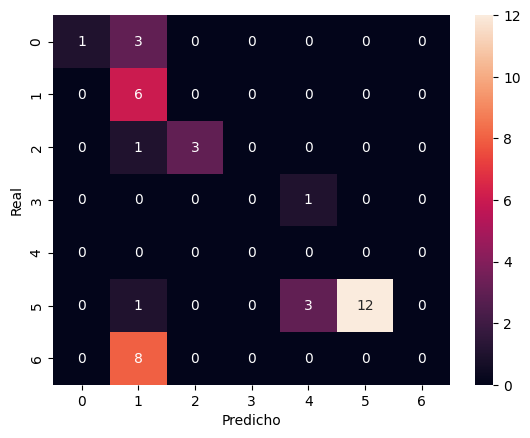

In [105]:
modelo_naive_bayes = GaussianNB()
modelo_naive_bayes.fit(X_train, y_train)
y_pred = modelo_naive_bayes.predict(X_val)

obtener_metricas_evaluacion(y_val, y_pred)


Accuracy: 0.8205128205128205
Precision: [0.25, 0.8333333333333334, 0.75, 0.0, 0.9375, 1.0]
Recall: [1.0, 0.5, 1.0, 0, 0.9375, 0.8888888888888888]
F1: [0.4, 0.625, 0.8571428571428571, 0, 0.9375, 0.9411764705882353]


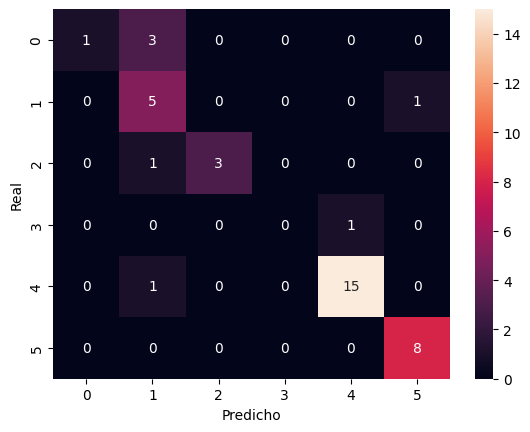

In [106]:
modelo_svm = SVC()
modelo_svm.fit(X_train, y_train)
y_pred = modelo_svm.predict(X_val)

obtener_metricas_evaluacion(y_val, y_pred)

Accuracy: 0.8461538461538461
Precision: [0.5, 0.8333333333333334, 0.75, 0.0, 0.9375, 1.0]
Recall: [1.0, 0.625, 1.0, 0, 0.9375, 0.8]
F1: [0.6666666666666666, 0.7142857142857143, 0.8571428571428571, 0, 0.9375, 0.888888888888889]


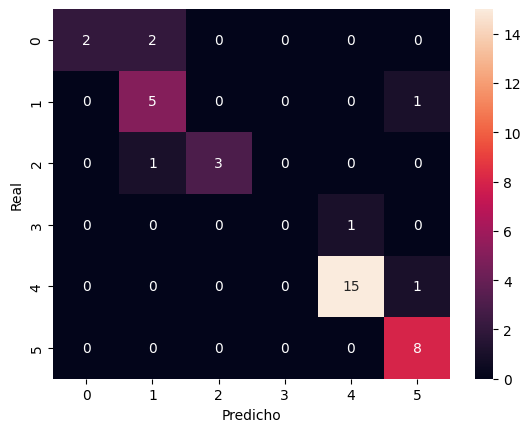

In [107]:
modelo_regresion_logistica = LogisticRegression()
modelo_regresion_logistica.fit(X_train, y_train)
y_pred = modelo_regresion_logistica.predict(X_val)

obtener_metricas_evaluacion(y_val, y_pred)
